Train confusion matrix:
[[ 485.   66.]
 [ 319.  730.]]
Train error -> 0.240625
Test confusion matrix:
[[ 111.   33.]
 [  85.  171.]]
Test error -> 0.295


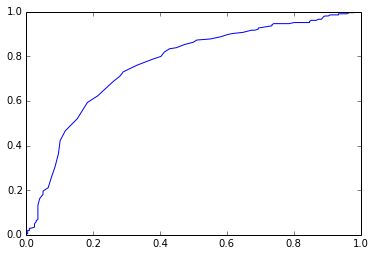

In [2]:
from base.gnb import GaussianNaiveBayes
from base.utils import confusion_matrix, acc, sens, spec
from data import data
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.interactive(False)
from matplotlib import pyplot


def roc(scores, pos, neg, threshold):
    return map(lambda x: pos if x >= threshold else neg, scores)


if __name__ == '__main__':
    train, test = data.load_news()
    train = train['train']
    test = test['test']
    features = train.shape[1] - 1
    gnb = GaussianNaiveBayes(features)
    gnb.fit(train)

    # train accuracy
    y_true = train[:, -1]
    y_pred = gnb.predict(train[:, :-1])
    cm = confusion_matrix(y_true, y_pred)
    print "Train confusion matrix:"
    print cm
    print "Train error ->", 1.-acc(cm)

    # test accuracy
    y_true = test[:, -1]
    y_pred = gnb.predict(test[:, :-1])
    cm = confusion_matrix(y_true, y_pred)
    print "Test confusion matrix:"
    print cm
    print "Test error ->", 1.-acc(cm)
    y_pred = gnb.predict(test[:, :-1])

    # draw roc
    y_score = gnb.predict(test[:, :-1], score=True)
    score_min = min(y_score)
    score_max = max(y_score)
    area = score_max - score_min
    roc_data = []
    for score in np.arange(score_min, score_max, area / 200.0):
        y_pred = map(lambda x: 1. if x >= score else -1., y_score)
        cm = confusion_matrix(y_true, y_pred)
        roc_data.append([1 - sens(cm), spec(cm)])
    roc_data = np.asarray(roc_data)
    pyplot.plot(roc_data[:, 0], roc_data[:, 1])
    pyplot.show()